<a href="https://colab.research.google.com/github/Deepkhut/SRIP_IITGN_2022_ML/blob/main/TASK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from jax import grad, jit
import jax.numpy as jnp   # jax's numpy version with GPU support
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

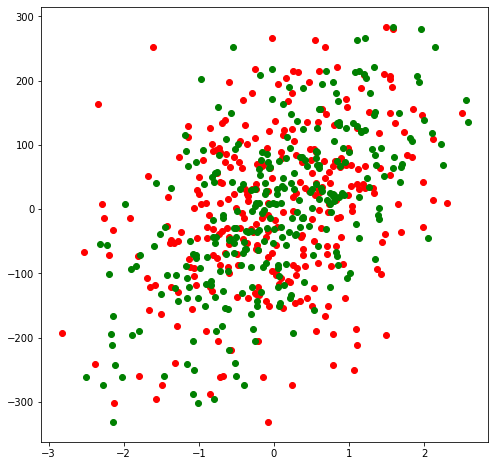

In [ ]:
X,y= make_regression(n_samples = 300, n_features=  3, noise = 5)
y=y.reshape((y.shape[0],1))
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15) #Splitting data into train and test
fig = plt.figure(figsize=(8,8))
plt.scatter(X[:,0], y, c='r')
plt.scatter(X[:,1], y, c='g')
plt.show()

In [ ]:
def loss(w,b,X,y):          #Mean Squared Error (MSE) function to calculate loss
  pred = X.dot(w)+ b
  return ((pred-y)**2).mean()

In [ ]:
Weights = jnp.zeros((X_train.shape[1],1)) # jnp array with zero initialization
bias = 0.
l_rate = 0.001
n_iter = 3000

In [ ]:
#gradient functions for weights and bias
gradW = jit(grad(loss, argnums=0)) #wrapped with jit function for faster processing
gradb = jit(grad(loss,argnums=1))
#  “argnums” parameter allows us to numerate the arguments

In [ ]:
for _ in range(n_iter):
  dW = gradW(Weights,bias,X_train,y_train)
  db = gradb(Weights,bias,X_train,y_train)
  #print(loss(Weights,bias,X_train,y_train))
  Weights -= dW*l_rate
  bias-= db*l_rate
print(loss(Weights,bias,X_train,y_train))

24.526329


In [ ]:
loss(Weights, bias, X_test, y_test) #Model's Loss on test set

DeviceArray(18.51865, dtype=float32)

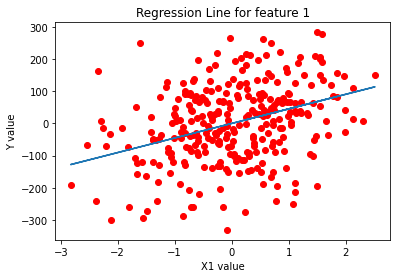

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 1")
ax.set_xlabel("X1 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,0], y, c='r')
plt.plot(X[:,0], X[:,0]*Weights[0]+bias)
plt.show()

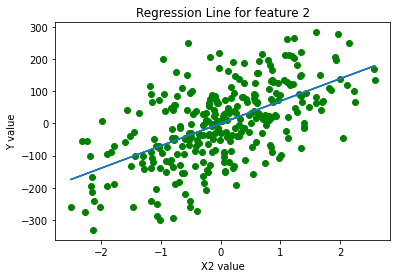

In [ ]:
fig, ax = plt.subplots()
ax.set_title("Regression Line for feature 2")
ax.set_xlabel("X2 value")
ax.set_ylabel("Y value")
plt.scatter(X[:,1], y, c='g')
plt.plot(X[:,1], X[:,1]*Weights[1]+bias)
plt.show()